In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.cluster import KMeans
import re
import preprocessor as p#forming a separate feature for cleaned tweets
import string
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jonas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = []
for file in range(14):
    data.append(open('Tweet-Data/Digital_Counterpart_tweets-'+str(2007+file)+'.jl')) 

In [3]:
doc = []
for file in data:
    for line in file:
        doc.append(json.loads(line))

In [4]:
emptyList = []
for dict in doc:
    emptyList.append(dict['response'])
    
len(emptyList)

22

In [5]:
def check(dictionary):
    if dictionary['result_count'] == 0: return False
    else: return True

In [6]:
emptyData = []
for dict in emptyList:
    if check(dict['meta']): emptyData.append(dict['data'])
len(emptyData)

22

In [7]:
pd.DataFrame(emptyData[2])

,reply_settings,source,author_id,lang,entities,conversation_id,public_metrics,possibly_sensitive,created_at,id,text,referenced_tweets,in_reply_to_user_id
0,everyone,Twitter Web Client,79282355,en,"{'hashtags': [{'start': 128, 'end': 137, 'tag'...",7124239706,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,2009-12-28T14:44:23.000Z,7124239706,The Decade In DataForbes... by their increasin...,NaN,NaN
1,everyone,Twitter Web Client,19008999,en,"{'mentions': [{'start': 0, 'end': 7, 'username...",6817077662,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,2009-12-19T08:14:10.000Z,6824169402,@dmgice Yet they carry increasing value forwar...,"[{'type': 'replied_to', 'id': '6817077662'}]",22860585
2,everyone,Twitter Web Client,14633924,en,"{'hashtags': [{'start': 128, 'end': 136, 'tag'...",6666367314,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,2009-12-14T16:39:30.000Z,6666367314,"""If the suburb is the topographical expression...",NaN,NaN
3,everyone,Twitter Web Client,15413016,en,"{'annotations': [{'start': 30, 'end': 44, 'pro...",6579522012,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,2009-12-11T21:36:20.000Z,6579522012,"Incredible, almost all of the Uncharted voice ...",NaN,NaN
4,everyone,Twitter Web Client,23929155,en,NaN,5831602627,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,2009-11-18T17:19:43.000Z,5831602627,Can traditional or lofi methods of storytellin...,NaN,NaN
5,everyone,Twitter Web Client,81211419,en,NaN,5325182843,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,2009-10-31T23:21:27.000Z,5325182843,"and the digital counterpart, now part of the N...",NaN,NaN
6,everyone,Twitter Web Client,21632675,en,"{'mentions': [{'start': 0, 'end': 10, 'usernam...",5230536685,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,2009-10-28T13:55:51.000Z,5230582388,@chosokabe at least you weren't the only one h...,"[{'type': 'replied_to', 'id': '5230536685'}]",50668973
7,everyone,Twitter Web Client,23613197,en,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",5203312011,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,2009-10-27T15:39:49.000Z,5203312011,RT @spokehq: If folk art has a digital counter...,NaN,NaN
8,everyone,Twitter Web Client,14327828,en,"{'annotations': [{'start': 18, 'end': 23, 'pro...",4606126236,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,2009-10-04T16:44:33.000Z,4606126236,I really love the iPhone app for reading Kindl...,NaN,NaN
9,everyone,twitterfeed,15167706,en,"{'annotations': [{'start': 25, 'end': 35, 'pro...",3672866109,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",False,2009-08-31T20:22:35.000Z,3672866109,`NBA 2K10&#39; cover athlete Kobe Bryant takes...,NaN,NaN


In [8]:
df = pd.DataFrame(emptyData[0])

In [9]:
for obj in range(1,len(emptyData)):
    df = df.append(pd.DataFrame(emptyData[obj]))

In [10]:
df.shape

(6192, 16)

In [11]:
df_clean = df

In [12]:
df_clean = df_clean[['lang','author_id','source','text', 'created_at']]

In [13]:
def isRT(text):
        if text.startswith("RT"): return "True"
        else: return "False"

In [14]:
df_clean['is_RT'] = df_clean['text'].map(isRT)

<ipython-input-14-7551cb54dc09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['is_RT'] = df_clean['text'].map(isRT)


In [15]:
df_clean = df_clean[df_clean['is_RT']=="False"]

In [16]:
df_clean.shape

(3940, 6)

In [17]:
import seaborn as sns

C:\Users\Jonas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lang', ylabel='count'>

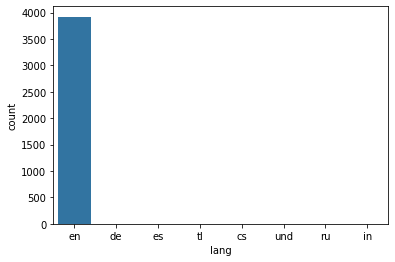

In [18]:
sns.countplot(df_clean['lang'])

In [19]:
df_lang = df_clean.copy()
df_lang = df_lang.groupby('lang').agg({'lang':'count'})
df_lang

,lang
lang,
cs,1
de,5
en,3922
es,1
in,1
ru,1
tl,5
und,4


In [20]:
df_clean = df_clean[(df_clean['lang'] == "en")]
df_clean = df_clean.drop(['is_RT'], axis=1)

In [21]:
def createdAt(date):
    return date.split('-')[:1][0]
    

In [22]:
df_clean['year'] = df_clean.created_at.map(createdAt)
df_clean.head()

,lang,author_id,source,text,created_at,year
0,en,757859,Twitter Web Client,"As much as I love vinyl, I should admit defeat...",2007-10-18T03:41:03.000Z,2007
1,en,6990822,Twitter Web Client,"Radness. Asian people, once again proving that...",2007-09-27T08:36:00.000Z,2007
0,en,8178692,Twitter Web Client,I bet the fascination of things like twitter a...,2008-12-17T17:26:04.000Z,2008
1,en,14124777,Twitter Web Client,@researchgoddess Lol; thanks! I love working ...,2008-10-23T18:24:07.000Z,2008
2,en,12082342,Twitter Web Client,is fixing bugs. I never liked insects and now ...,2008-08-05T14:33:15.000Z,2008


In [23]:
df_clean = df_clean.drop(columns=['created_at', 'lang'], axis=1)
df_clean['hashtag'] = df_clean['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df_clean

,author_id,source,text,year,hashtag
0,757859,Twitter Web Client,"As much as I love vinyl, I should admit defeat...",2007,[]
1,6990822,Twitter Web Client,"Radness. Asian people, once again proving that...",2007,[]
0,8178692,Twitter Web Client,I bet the fascination of things like twitter a...,2008,[]
1,14124777,Twitter Web Client,@researchgoddess Lol; thanks! I love working ...,2008,[]
2,12082342,Twitter Web Client,is fixing bugs. I never liked insects and now ...,2008,[]
...,...,...,...,...,...
301,1337678305,GameDevbotting,NONDIGITAL GAMES. HOW ARE THEY RELATED TO THEI...,2020,[boardgames]
302,1195605686983393280,Twitter for Android,A voting system for drops. Digital content. A ...,2020,[]
303,1015457003475521538,Twitter Web App,@PlayWarframe Why would I want to wear somethi...,2020,[]
304,1110931116167442435,Twitter Web App,"@OGJunkyard @Forbes @brave Because old media, ...",2020,[]


In [24]:
text = df_clean['text']
text = text.tolist()

In [25]:
for i,v in enumerate(text):
    text[i] = p.clean(v)

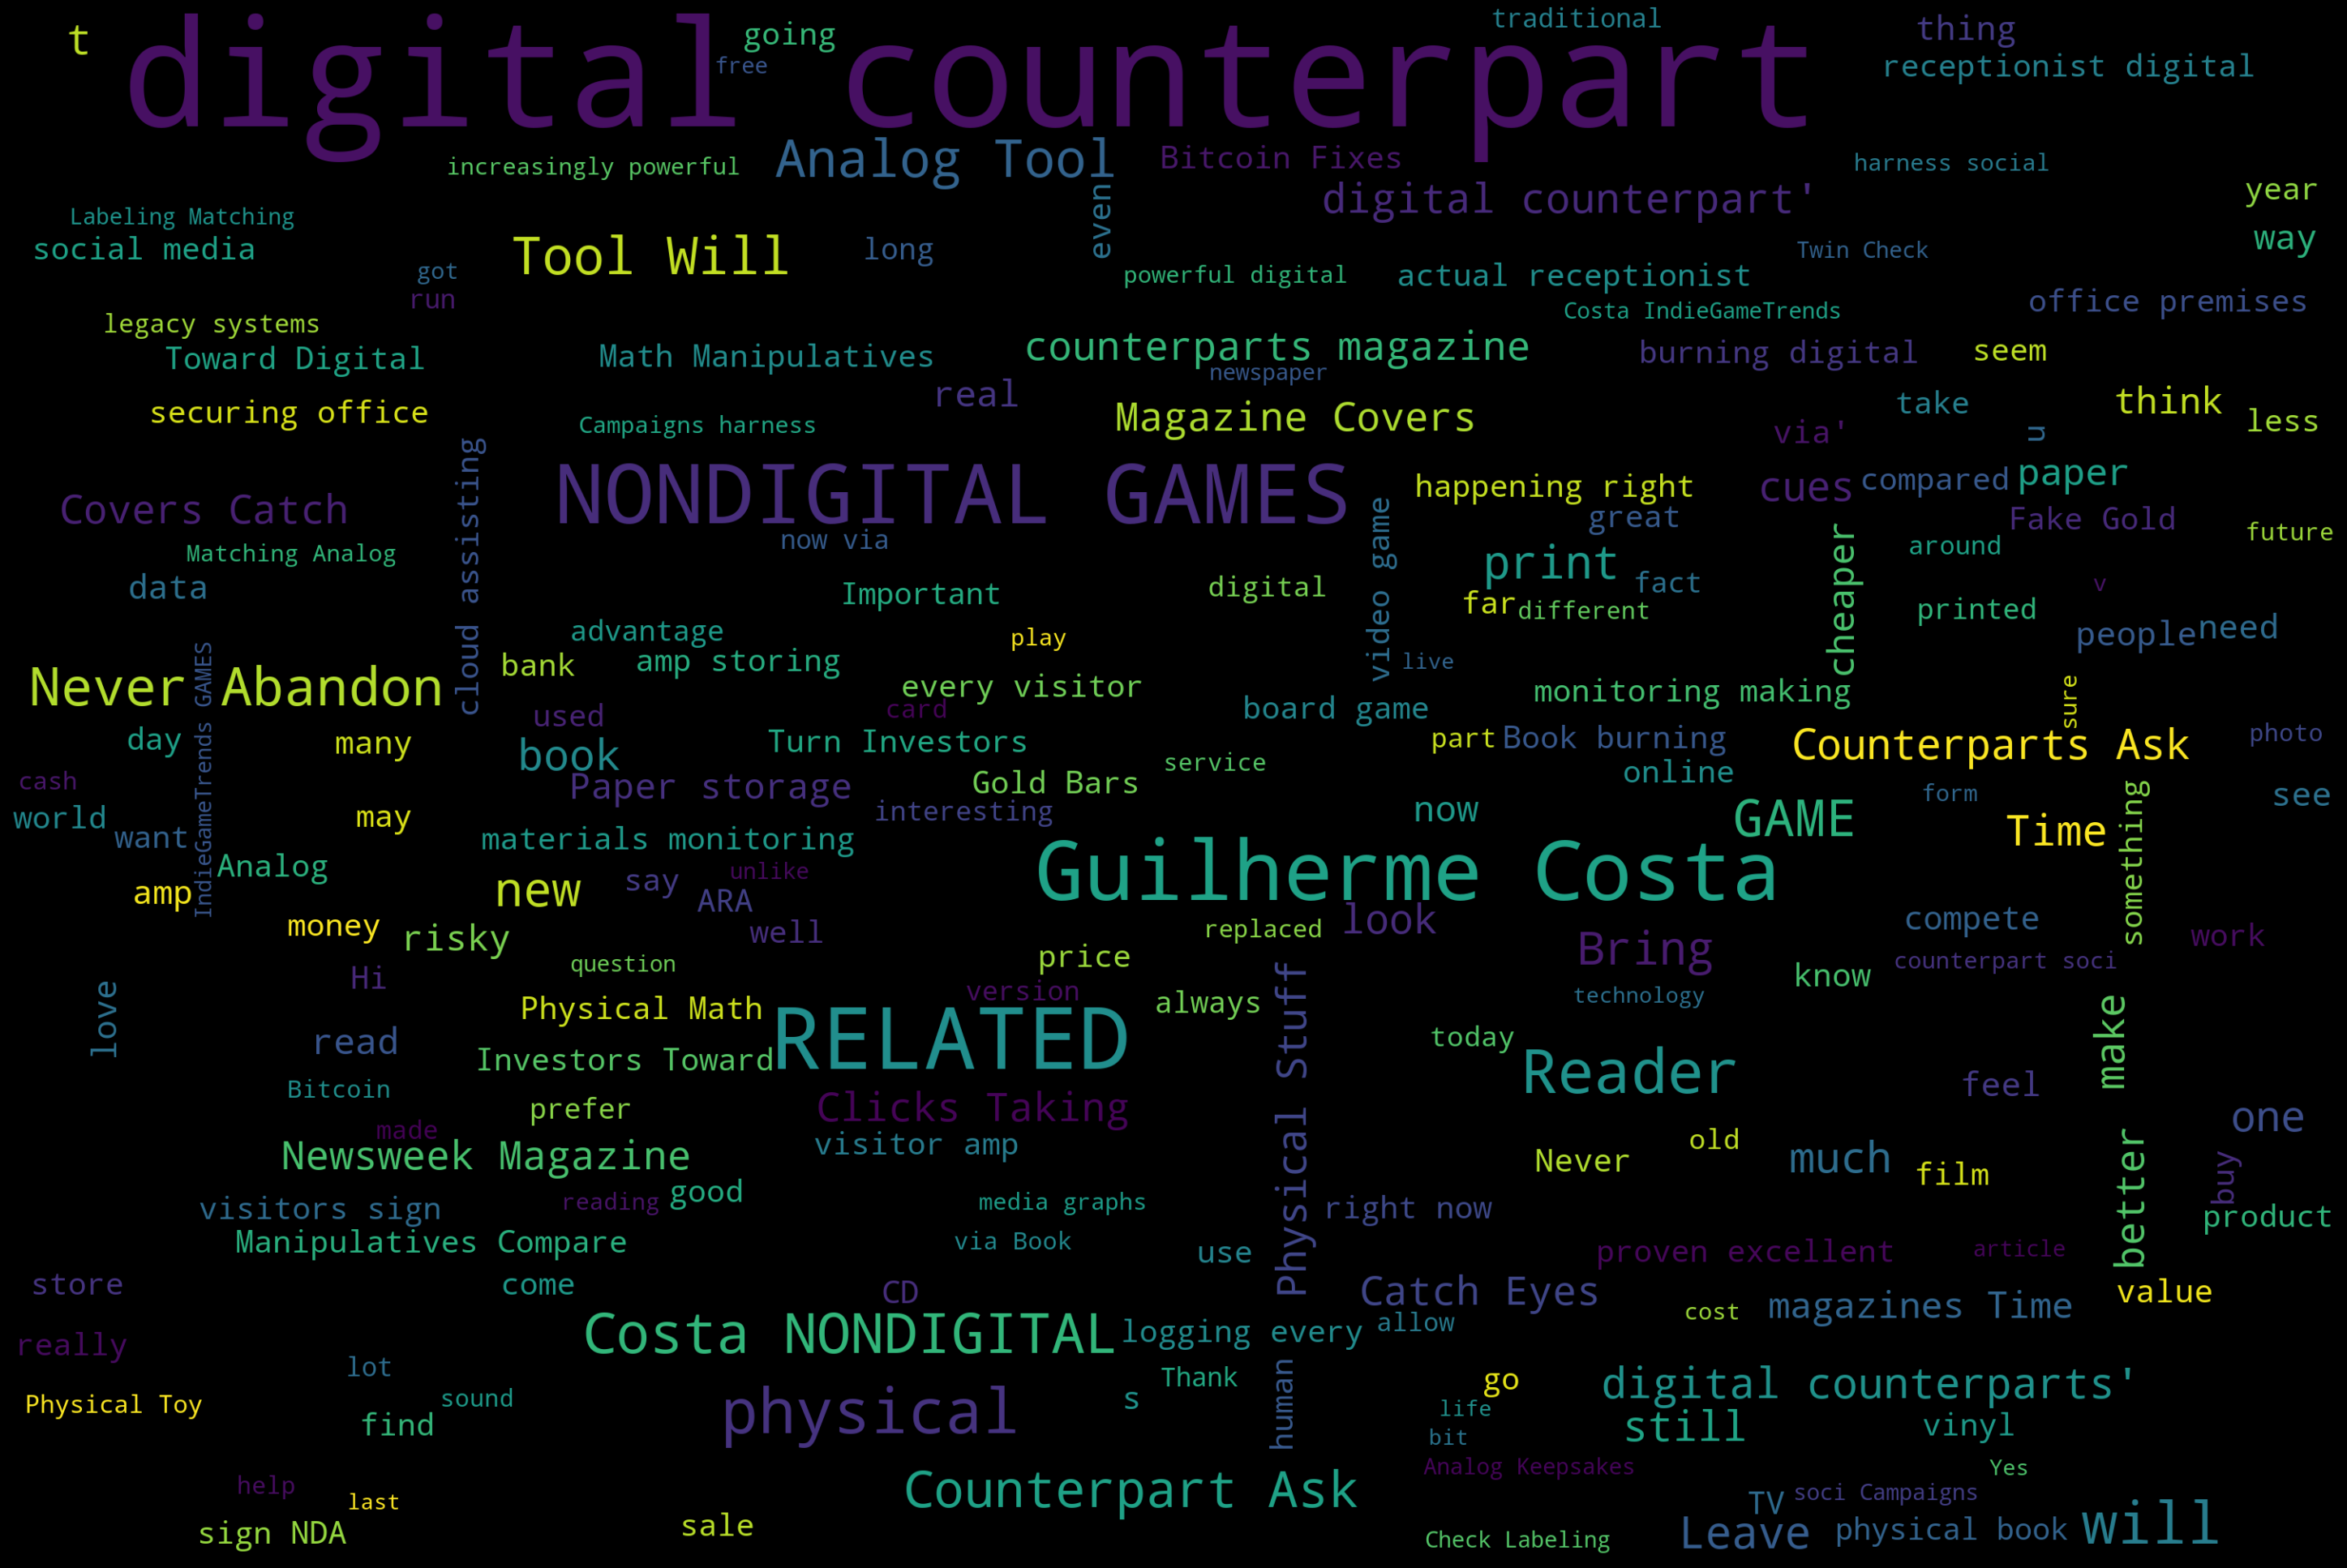

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
def txt_cleaner(text):
    
    text = text.encode(encoding="ascii", errors="ignore")
    text = text.decode() # removing unicode from the text 
    
    text = p.clean(text)
    
    text = text.lower() #lowering all the text
    
    punct = set(string.punctuation)
    text = "".join([ch for ch in text if ch not in punct]) #remove punctation
    
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words]) #remove stopwords
    # try out stemming and lemmatization
    return text

In [28]:
df_clean['text'] = df_clean.text.map(txt_cleaner)

In [29]:
pd.DataFrame(text).to_pickle("../pickles/clean_digital_counterpart.plk")

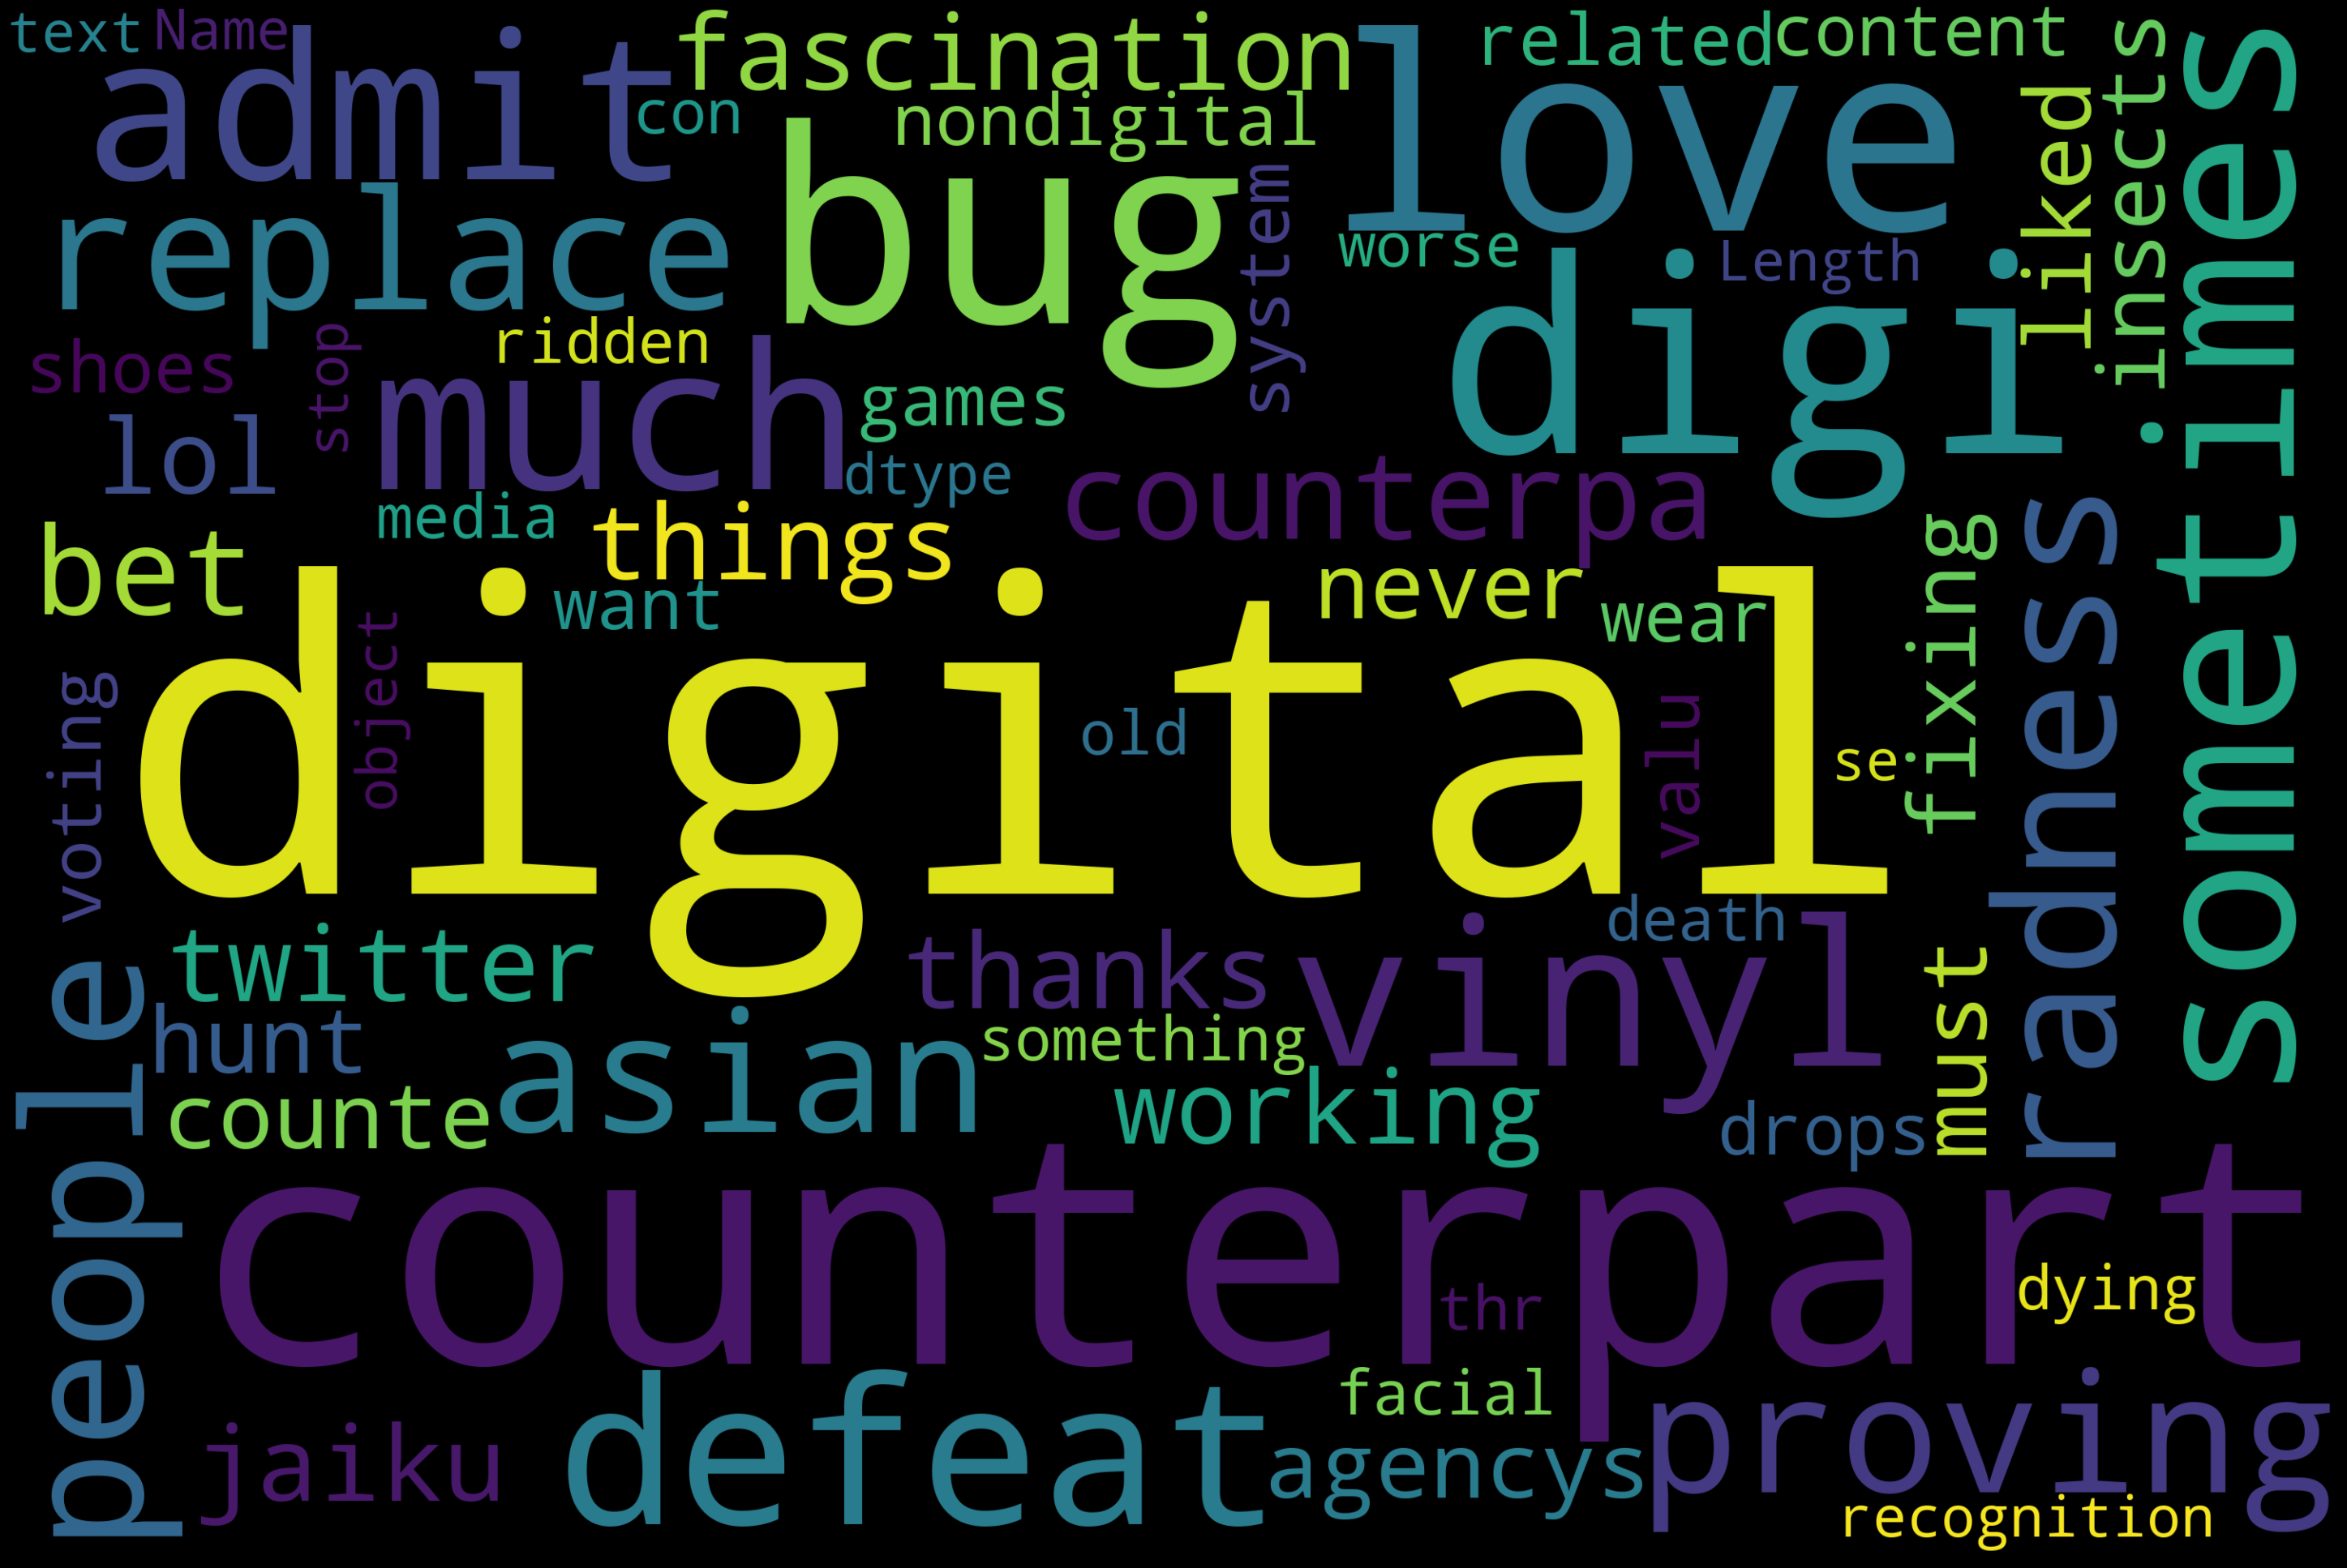

In [30]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df_clean['text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
documents = df_clean['text']

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["Azure is the leading IOT"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Data Analysis is a trend for amp"])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 digital
 counterpart
 counterparts
 physical
 paper
 storage
 risky
 like
 print
 book
Cluster 1:
 costa
 guilherme
 related
 nondigital
 games
 counterparts
 digital
 indiegametrends
 gamedevbrbot
 eyesavaging
Cluster 2:
 clicks
 eyes
 newsweek
 covers
 cues
 catch
 taking
 magazine
 magazines
 time
Cluster 3:
 ask
 readers
 abandon
 tool
 analog
 leave
 bring
 stuff
 counterpart
 physical


Prediction
[0]
[0]
